## 주요절차

### 1. 초기데이터 분석

#### 1-1. 데이터딕셔너리(각 열의 의미, 데이터의 의미해석관련 스펙 또는 메뉴얼) 확인
#### 1-2 데이터 기초정보 확인 (사이즈, 열이름, 데이터형)

### 2. 데이터 정제

#### 2.1. 원본데이터에서 분석가능한 형태로 데이터 전처리 (형변환, 열이름 변경등)
#### 2.2. 데이터 클리닝: 이상치, 결측치처리

### 3. 추가데이터 분석

#### 3.1 데이터 정제후 데이터딕셔너리 재확인
#### 3.2 기초통계 정보 확인 (최대값, 최소값, 평균값, 표준편차, 최빈값, 유일값 등)
#### 3.3 시각화를 통한 데이터이해 심화 

* 3.3.1 단일 열: 데이터의 성격에 따른 다양한 차트 적용  
* 3.3.2 복수 열: 두개의 열간 연관관계 분석(Pair Plot 또는 Seaborn의 관련 지원 차트등)

#### 3.4 데이터 분석 결과도출

# 데이터분석 적용 실습 템플릿

## 데이터 수집

In [31]:
# 데이터 소스를 확보하세요

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc

font_location = "C:\Windows\Fonts\malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)
plt.rcParams['axes.unicode_minus'] = False

In [33]:
school = pd.read_excel("전국초중등학교위치표준데이터-20221219.xls")
new_colums = school.iloc[0]
school = school[1:]
school.columns = new_colums
school.head()

,학교ID,학교명,학교급구분,설립일자,설립형태,본교분교구분,운영상태,소재지지번주소,소재지도로명주소,시도교육청코드,시도교육청명,교육지원청코드,교육지원청명,생성일자,변경일자,위도,경도,데이터기준일자,제공기관코드,제공기관명
1,B000004955,북삼초등학교,초등학교,1946-01-24,공립,본교,운영,강원도 동해시 지흥동 124-1,강원도 동해시 지양길 77,7800000,강원도교육청,7841000,강원도동해교육지원청,2013-11-29,2021-09-30,37.4956557859,129.1009681324,2022-03-24,C738100,청주대학교 지방교육재정연구원
2,B000009470,광남중학교,중학교,1982-03-05,공립,본교,운영,경기도 광명시 광명동 384-6,경기도 광명시 광명로 785,7530000,경기도교육청,7591000,경기도광명교육지원청,2013-11-29,2021-09-30,37.4700747467,126.8475588292,2022-03-24,C738100,청주대학교 지방교육재정연구원
3,B000011816,부일외국어고등학교,고등학교,1995-03-01,사립,본교,운영,부산광역시 사하구 감천동 634-61,부산광역시 사하구 감천로73번길 36,7150000,부산광역시교육청,7171000,부산광역시서부교육지원청,2013-11-29,2021-09-30,35.0907360856,129.0025604446,2022-03-24,C738100,청주대학교 지방교육재정연구원
4,B000011104,율하중학교,중학교,2010-03-01,공립,본교,운영,경상남도 김해시 율하동 1293,경상남도 김해시 율하1로 39,9010000,경상남도교육청,9091000,경상남도김해교육지원청,2013-11-29,2021-09-30,35.1750809823,128.8080009585,2022-03-24,C738100,청주대학교 지방교육재정연구원
5,B000012153,삼성여자고등학교,고등학교,1975-03-03,사립,본교,운영,부산광역시 사하구 감천동 598-1,부산광역시 사하구 감천로43번길 45,7150000,부산광역시교육청,7171000,부산광역시서부교육지원청,2013-11-29,2021-09-30,35.0942249707,128.9982328419,2022-03-24,C738100,청주대학교 지방교육재정연구원


## 1. 초기데이터 분석

### 1-1. 데이터스키마 확인

#### 각 열의 의미, 데이터의 의미해석관련 스펙 또는 메뉴얼을 확인 가능시 진행 하세요
* A열 :  A열의 의미를 기술
* B열 :  B열의 의미를 기술  
  ...

In [34]:
school.columns

Index(['학교ID', '학교명', '학교급구분', '설립일자', '설립형태', '본교분교구분', '운영상태', '소재지지번주소',
       '소재지도로명주소', '시도교육청코드', '시도교육청명', '교육지원청코드', '교육지원청명', '생성일자', '변경일자',
       '위도', '경도', '데이터기준일자', '제공기관코드', '제공기관명'],
      dtype='object', name=0)

### 1-2. 데이터 기초정보 확인

* 사이즈, 데이터형, 기초통계항목등을 확인하세요  

In [35]:
#df.shape
#df.info()

In [36]:
school.shape

(23948, 20)

In [37]:
school.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23948 entries, 1 to 23948
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   학교ID      23948 non-null  object
 1   학교명       23948 non-null  object
 2   학교급구분     23948 non-null  object
 3   설립일자      23948 non-null  object
 4   설립형태      23948 non-null  object
 5   본교분교구분    23948 non-null  object
 6   운영상태      23948 non-null  object
 7   소재지지번주소   23947 non-null  object
 8   소재지도로명주소  23945 non-null  object
 9   시도교육청코드   23948 non-null  object
 10  시도교육청명    23948 non-null  object
 11  교육지원청코드   23948 non-null  object
 12  교육지원청명    23948 non-null  object
 13  생성일자      23948 non-null  object
 14  변경일자      23948 non-null  object
 15  위도        23948 non-null  object
 16  경도        23948 non-null  object
 17  데이터기준일자   23948 non-null  object
 18  제공기관코드    23948 non-null  object
 19  제공기관명     23948 non-null  object
dtypes: object(20)
memory usage: 3.7+ MB


* 기초통계항목

In [38]:
# df.desribe()

In [39]:
school.describe()

,학교ID,학교명,학교급구분,설립일자,설립형태,본교분교구분,운영상태,소재지지번주소,소재지도로명주소,시도교육청코드,시도교육청명,교육지원청코드,교육지원청명,생성일자,변경일자,위도,경도,데이터기준일자,제공기관코드,제공기관명
count,23948,23948,23948,23948,23948,23948,23948,23947,23945,23948,23948,23948,23948,23948,23948,23948,23948,23948,23948,23948
unique,12006,10447,3,6892,3,2,1,11328,11361,17,17,178,178,2,23,21490,21349,2,2,2
top,B000004955,금성초등학교,초등학교,2006-03-01,공립,본교,운영,서울특별시 강서구 내발산동 169-1,인천광역시 미추홀구 석정로 165,7530000,경기도교육청,9022000,경상남도창원교육지원청,2013-11-29,2021-07-05,37.473959877,126.65199872,2022-03-24,C738100,청주대학교 지방교육재정연구원
freq,2,22,12642,287,20534,23578,23948,8,16,4949,4949,454,454,23908,11940,8,8,11978,11978,11978


## 2. 데이터 정제

### 2-1. 간단한 데이터 전처리

In [40]:
# 원본데이터로서 읽기 가능한 형태로 데이터처리를 하세요. (열이름 변경, 형변환, 피봇, 분석용 데이터 셋 생성 등)

In [41]:
school['위도'] = school['위도'].astype('float64')
school['경도'] = school['경도'].astype('float64')

### 2-2. 데이터 클리닝

In [42]:
# 결측치, 중복값, 이상치 처리등의 작업을 진행하세요

* 결측치

    - 결측치 열 확인

In [43]:
missing_values = school.isnull().any()  
column_missing_values = missing_values[ missing_values == True ]
column_missing_values

0
소재지지번주소     True
소재지도로명주소    True
dtype: bool

In [44]:
# df.isnull().any(axis=1)

In [45]:
school[school.isnull().any(axis = 1)]

,학교ID,학교명,학교급구분,설립일자,설립형태,본교분교구분,운영상태,소재지지번주소,소재지도로명주소,시도교육청코드,시도교육청명,교육지원청코드,교육지원청명,생성일자,변경일자,위도,경도,데이터기준일자,제공기관코드,제공기관명
14413,B000023066,신우초등학교,초등학교,2021-09-01,공립,본교,운영,경기도 하남시 감일동 82번지 일원,NaN,7530000,경기도교육청,7692000,경기도광주하남교육지원청,2013-11-29,2021-08-18,37.510998,127.160840,2021-09-15,7001220,한국교원대학교
22212,B000026906,판교대장초등학교,초등학교,2021-06-01,공립,본교,운영,경기도 성남시 분당구 대장동 155일원,NaN,7530000,경기도교육청,7551000,경기도성남교육지원청,2013-11-29,2021-06-01,37.368259,127.069684,2021-09-15,7001220,한국교원대학교
22885,B000026907,판교대장중학교,중학교,2021-06-01,공립,본교,운영,경기도 성남시 분당구 대장동 189일원,NaN,7530000,경기도교육청,7551000,경기도성남교육지원청,2013-11-29,2021-06-01,37.368500,127.069555,2021-09-15,7001220,한국교원대학교
23936,B000030318,초롱초등학교,초등학교,2021-09-01,공립,본교,운영,NaN,경기도 파주시 양지로 101,7530000,경기도교육청,7681000,경기도파주교육지원청,2013-11-29,2021-08-18,37.710002,126.719917,2021-09-15,7001220,한국교원대학교


* 결측치 보정

In [46]:
# df['나이'] = df['나이'].fillna(0)

In [47]:
# df = df.fillna(0)

In [48]:
school = school.fillna(0)

* 중복값 삭제 (필요시)

In [49]:
# df[df.duplicated(keep=False)]

In [50]:
school[school.duplicated(keep=False)]

,학교ID,학교명,학교급구분,설립일자,설립형태,본교분교구분,운영상태,소재지지번주소,소재지도로명주소,시도교육청코드,시도교육청명,교육지원청코드,교육지원청명,생성일자,변경일자,위도,경도,데이터기준일자,제공기관코드,제공기관명


In [51]:
# df.drop_duplicates(inplace=True)

## 3. 추가데이터 분석

### 3.1. 데이터 정제후 데이터스키마 재확인

* 1-2 작업을 다시 해보세요.

### 3.2 데이터 기초정보 정보 확인

* 최대값, 최소값, 평균값, 표준편차, 최빈값, 유일값, 결측치, 이상치 등의 정보를 재확인해 보세요

### 3.3 시각화를 통한 데이터이해 심화

* 데이터의 성격에 따라 이해도를 올리기 위해 시각화가 필요한 데이터차트를 만들어 보세요.  
  (Seaborn 추천: 페어플롯, 막대차트, 파이차트, 라인차트, 히스토그램등..)

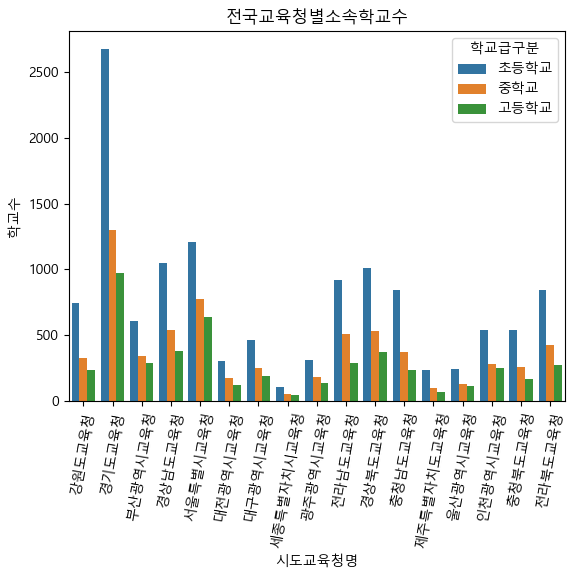

In [52]:
sns.countplot(x = '시도교육청명', data = school, hue = '학교급구분')
plt.xticks(rotation = 80)
plt.ylabel('학교수')
plt.title('전국교육청별소속학교수')
plt.show()

* 경기도교육청에 소속된 학교 수가 제일 많다
* 두번째로 높은건 서울특별시교육청  
  => 수도권쪽에 학교가 밀집되어있다는걸 알 수 있다.
* 수도권 제외 지방 교육청 중에선 경상남도교육청이 높다.

In [53]:
value_counts = school['학교급구분'].value_counts()
school_level = value_counts.index.tolist()
values = value_counts.values

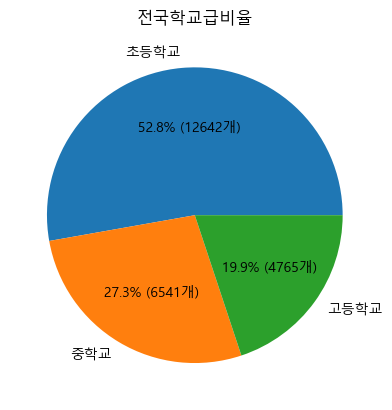

In [54]:
plt.pie(values , labels = school_level, autopct=lambda pct: f"{pct: .1f}% ({int(pct/100.*np.sum(values))}개)")
plt.title("전국학교급비율")
plt.show()

* 초등학교가 전체에 50퍼 이상을 차지한다. 전국에 초등학교가 가장 많다는걸 알 수 있다.

In [55]:
value_counts2 = school['본교분교구분'].value_counts()
school_branch = value_counts2.index.tolist()
values2 = value_counts2.values

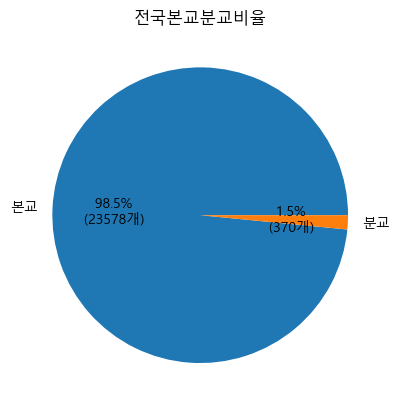

In [56]:
plt.pie(values2 , labels = school_branch, autopct=lambda pct: f"{pct: .1f}%\n ({int(pct/100.*np.sum(values))}개)")
plt.title("전국본교분교비율")
plt.show()

* 본교가 압도적으로 비중이 높다

<Axes: xlabel='경도', ylabel='위도'>

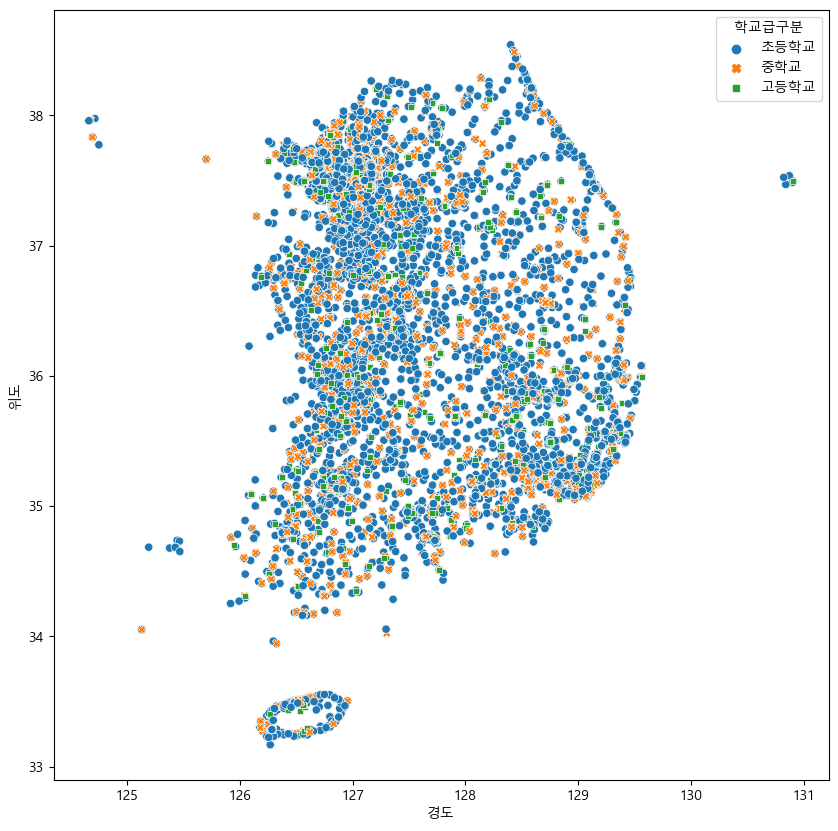

In [57]:
plt.figure(figsize = (10,10))
sns.scatterplot(data = school, x = '경도', y = '위도', hue = '학교급구분', style = '학교급구분')

* 초/중/고 중 전국에 많이 분포되어 있는 학교는 초등학교이다.  
  => 초등학생을 자녀로 둔 학부모를 대상, 혹은 초등교사를 대상으로 하는 비지니스 구상
* 서울/경기 지역, 경상남도, 전라북도와 충청남도 사이에 학교가 많이 밀집되어있다.